In [20]:
import pickle
from os import path
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def locomotion_trajectory(ax1, ax2, local_head_location, file_name):
    xmin, xmax = -0.1, 2
    ymin, ymax = -1.43, 0.67
    zmin, zmax = -1.65, 0.45
    ax1.plot(local_head_location[:,0], local_head_location[:,1], local_head_location[:,2])
    ax1.plot(local_head_location[0,0], local_head_location[0,1], local_head_location[0,2], marker='o', color='y')
    ax1.plot(local_head_location[-1,0], local_head_location[-1,1], local_head_location[-1,2], marker='*', color='r')
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_zlim(zmin, zmax)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.set_title(f"locomotion trajectory\n {file_name}")

    ax2.plot(local_head_location[:,0], local_head_location[:,1], local_head_location[:,2])
    ax2.plot(local_head_location[0,0], local_head_location[0,1], local_head_location[0,2], marker='o', color='y')
    ax2.plot(local_head_location[-1,0], local_head_location[-1,1], local_head_location[-1,2], marker='*', color='r')
    ax2.set_box_aspect((np.max(local_head_location[:,0])-np.min(local_head_location[:,0]), 
                        np.max(local_head_location[:,1])-np.min(local_head_location[:,1]),
                        np.max(local_head_location[:,2])-np.min(local_head_location[:,2])))
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("z")
    # 1print(np.min(local_head_location[:,0]), np.max(local_head_location[:,0]))
    # print(np.min(local_head_location[:,1]), np.max(local_head_location[:,1]))
    # print(np.min(local_head_location[:,2]), np.max(local_head_location[:,2]))


neural dynamics (all soma)

In [22]:
from sklearn.decomposition import PCA
def neural_dynamics(ax, neural_voltage, flag=0):
    abs_circuit = pickle.load(open("/home/zhaomengdi/Project/model_meta_worm/eworm/ghost_in_mesh_sim/output/video_online/video_online_abscircuit.pkl", 'rb'))
    if flag:
        data = neural_voltage[:,:]
    else:
        soma_seg_id = []
        cnt = 0
        for abs_cell in abs_circuit.cells:
            for seg in abs_cell.segments:
                if "Soma" in seg.name:
                    soma_seg_id.append(cnt)
                cnt += 1
        # print(cnt)
        data = neural_voltage[:, soma_seg_id]
    n_step, n_neuron = data.shape
    # print(n_step, n_neuron)
    n_component = 3  # #neuron
    pca = PCA(n_components=n_component)
    pca.fit(data)
    reduced_data = pca.fit_transform(data)
    # print(reduced_data.shape)

    # fig = plt.figure(figsize=(12,3))
    # ax1 = fig.add_subplot(1,2,1)
    # for i in range(n_component):
    #     plt.plot(reduced_data[:,i])

    xmin, xmax = -1700, 3450
    # ax = fig.add_subplot(1,4,3, projection='3d')
    ax.plot(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_zlim(xmin, xmax)
    ax.set_title("neural dynamics")
    # print(np.min(reduced_data), np.max(reduced_data))

muscle activation dynamics

In [23]:
def muscle_dynamics(ax, muscle_activation):
    data = muscle_activation
    n_step, n_muscle = data.shape
    # print(n_step, n_muscle)
    n_component = 3  # #neuron
    pca = PCA(n_components=n_component)
    pca.fit(data)
    reduced_data = pca.fit_transform(data)
    # print(reduced_data.shape)

    # fig = plt.figure(figsize=(12,3))
    # ax1 = fig.add_subplot(1,2,1)
    # for i in range(n_component):
    #     plt.plot(reduced_data[:,i])

    xmin, xmax = -3, 6
    # ax = fig.add_subplot(1,4,3, projection='3d')
    ax.plot(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_zlim(xmin, xmax)
    ax.set_title("muscle dynamics")
    # print(np.min(reduced_data), np.max(reduced_data))
    # plt.show()

relative location and velocity visualization

In [24]:
def body_state1(ax1, ax2, behavior_value):
    xloc_min, xloc_max = -0.37, 0.32
    yloc_min, yloc_max = -0.15, 0.15 #-0.05, 0.075
    zloc_min, zloc_max = -0.15, 0.15 #-0.075, 0.05

    # fig = plt.figure()
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax1.plot(behavior_value[0][:,0], behavior_value[1][:,0], behavior_value[2][:,0])
    ax1.plot(behavior_value[0][:,8], behavior_value[1][:,8], behavior_value[2][:,8])
    ax1.plot(behavior_value[0][:,16], behavior_value[1][:,16], behavior_value[2][:,16])
    ax1.set_xlim(xloc_min, xloc_max); ax1.set_xticks([-0.3, 0, 0.3]);   ax1.set_xticklabels([])
    ax1.set_ylim(yloc_min, yloc_max); ax1.set_yticks([-0.15, 0, 0.15]); ax1.set_yticklabels([]) #ax1.set_yticks([-0.05, 0, 0.05])
    ax1.set_zlim(zloc_min, zloc_max); ax1.set_zticks([-0.15, 0, 0.15]); ax1.set_zticklabels([]) #ax1.set_zticks([-0.05, 0, 0.05])
    ax1.set_box_aspect((np.max(xloc_max - xloc_min), 
                        np.max(yloc_max - yloc_min),
                        np.max(zloc_max - zloc_min)))
    ax1.set_title("relative position")

    xvel_min, xvel_max = -2, 1.7
    yvel_min, yvel_max = -1.5, 1.7
    zvel_min, zvel_max = -2, 1.7
    # ax2 = fig.add_subplot(1,2,2,projection='3d')
    ax2.plot(behavior_value[3][:,0],  behavior_value[4][:,0],  behavior_value[5][:,0])
    ax2.plot(behavior_value[3][:,8],  behavior_value[4][:,8],  behavior_value[5][:,8])
    ax2.plot(behavior_value[3][:,16],  behavior_value[4][:,16],  behavior_value[5][:,16])
    ax2.set_xlim(xvel_min, xvel_max); ax2.set_xticks([-2, -1, 0, 1]); ax2.set_xticklabels([])
    ax2.set_ylim(yvel_min, yvel_max); ax2.set_yticks([-1, 0, 1]);     ax2.set_yticklabels([])
    ax2.set_zlim(zvel_min, zvel_max); ax2.set_zticks([-2, -1, 0, 1]); ax2.set_zticklabels([])
    ax2.set_box_aspect((np.max(xvel_max - xvel_min), 
                        np.max(yvel_max - yvel_min),
                        np.max(zvel_max - zvel_min)))
    ax2.set_title("relative velocity")
    # plt.show()

In [25]:
def body_state2(ax1, ax2, ax3, ax4, behavior_value):
    xloc_min, xloc_max = -0.37, 0.32
    yloc_min, yloc_max = -0.15, 0.15 #-0.05, 0.075
    zloc_min, zloc_max = -0.15, 0.15 #-0.075, 0.05

    # fig = plt.figure()
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax1.plot(behavior_value[0][:,0], behavior_value[1][:,0], behavior_value[2][:,0])
    ax1.plot(behavior_value[0][:,8], behavior_value[1][:,8], behavior_value[2][:,8])
    ax1.plot(behavior_value[0][:,16], behavior_value[1][:,16], behavior_value[2][:,16])
    ax1.set_xlim(xloc_min, xloc_max); ax1.set_xticks([-0.3, 0, 0.3]);   ax1.set_xticklabels([])
    ax1.set_ylim(yloc_min, yloc_max); ax1.set_yticks([-0.15, 0, 0.15]); ax1.set_yticklabels([]) #ax1.set_yticks([-0.05, 0, 0.05])
    ax1.set_zlim(zloc_min, zloc_max); ax1.set_zticks([-0.15, 0, 0.15]); ax1.set_zticklabels([]) #ax1.set_zticks([-0.05, 0, 0.05])
    ax1.set_box_aspect((np.max(xloc_max - xloc_min), 
                        np.max(yloc_max - yloc_min),
                        np.max(zloc_max - zloc_min)))
    ax1.set_title("relative position")

    xvel_min, xvel_max = -2, 1.7
    yvel_min, yvel_max = -1.5, 1.7
    zvel_min, zvel_max = -2, 1.7
    # ax2 = fig.add_subplot(1,2,2,projection='3d')
    for ax, i, c in zip([ax2, ax3, ax4], [0, 8, 16], ['C0', 'C1', 'C2']):
        ax.plot(behavior_value[3][:,i],  behavior_value[4][:,i],  behavior_value[5][:,i],  color=c)
        ax.set_xlim(xvel_min, xvel_max); ax.set_xticks([-2, -1, 0, 1]); ax.set_xticklabels([])
        ax.set_ylim(yvel_min, yvel_max); ax.set_yticks([-1, 0, 1]);     ax.set_yticklabels([])
        ax.set_zlim(zvel_min, zvel_max); ax.set_zticks([-2, -1, 0, 1]); ax.set_zticklabels([])
        ax.set_box_aspect((np.max(xvel_max - xvel_min), 
                           np.max(yvel_max - yvel_min),
                           np.max(zvel_max - zvel_min)))
    ax2.set_title("relative velocity")
    # plt.show()

watch sensory input and normalization value

In [26]:
def neural_input(ax1, ax2, sensory_input, normalization_value):
    xmin, xmax = -0.06, 0.06
    # fig = plt.figure(figsize=(12,3))
    # ax1 = fig.add_subplot(1,2,1)
    ax1.plot(sensory_input)
    ax1.set_ylim(-0.1, 0.04)
    ax1.set_title("input")
    # ax2 = fig.add_subplot(1,2,2)
    ax2.plot(normalization_value[:,0])
    ax2.plot(normalization_value[:,1])
    ax2.set_ylim(xmin, xmax)
    ax2.set_title("normalization value")
    # plt.show()

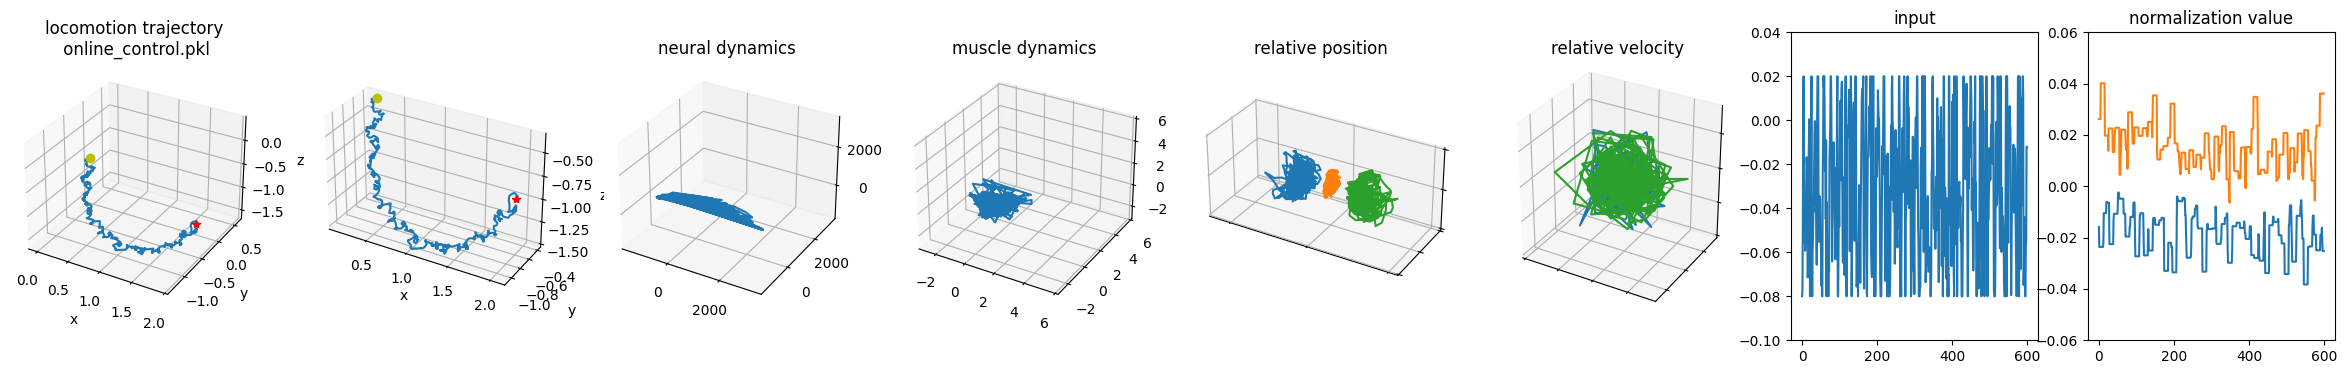

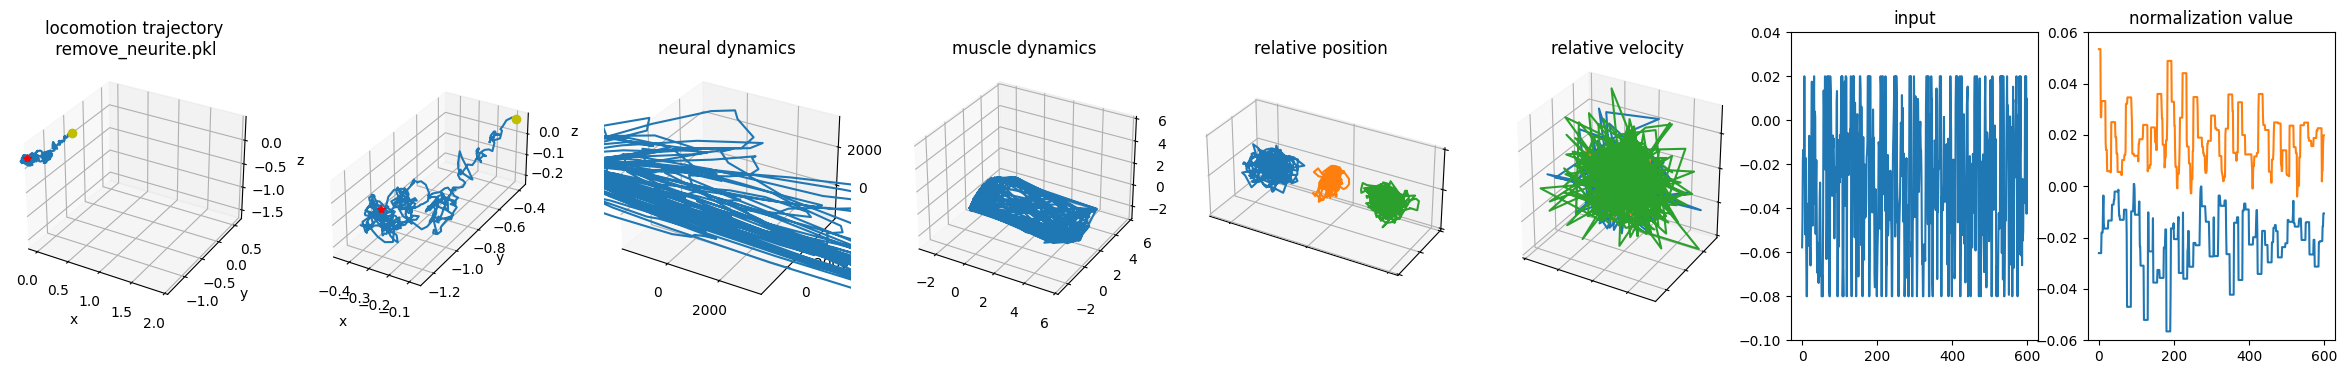

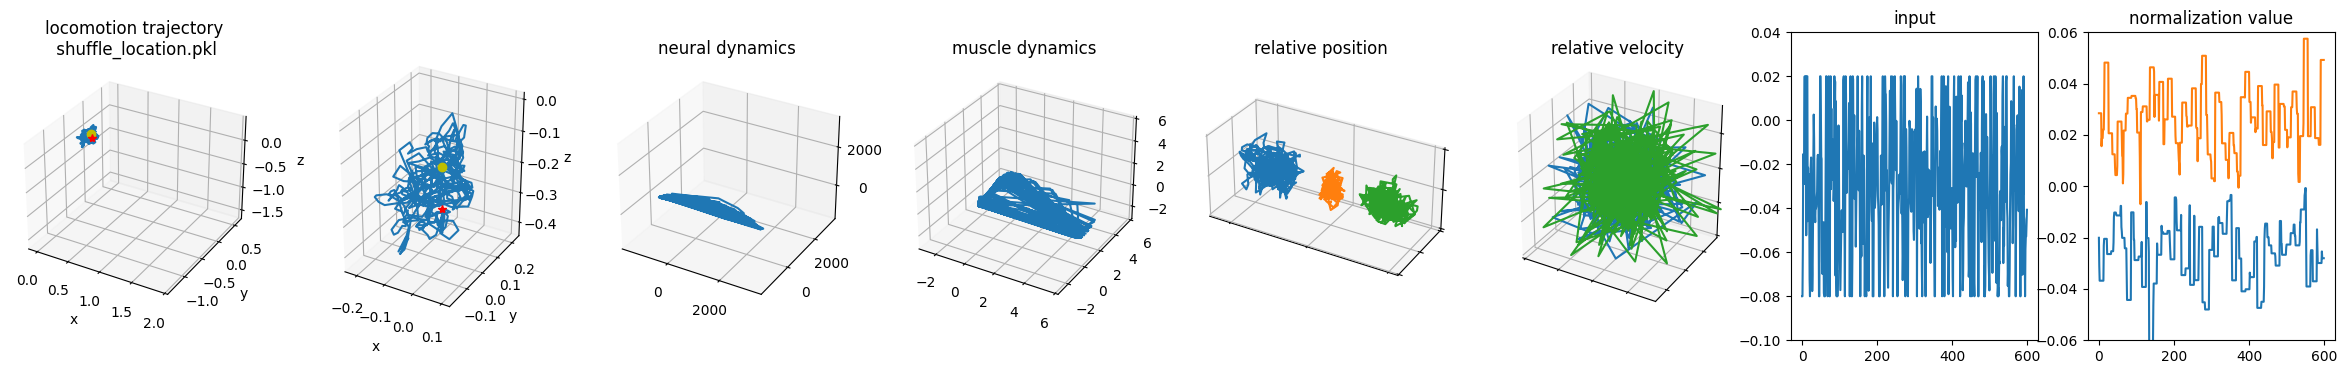

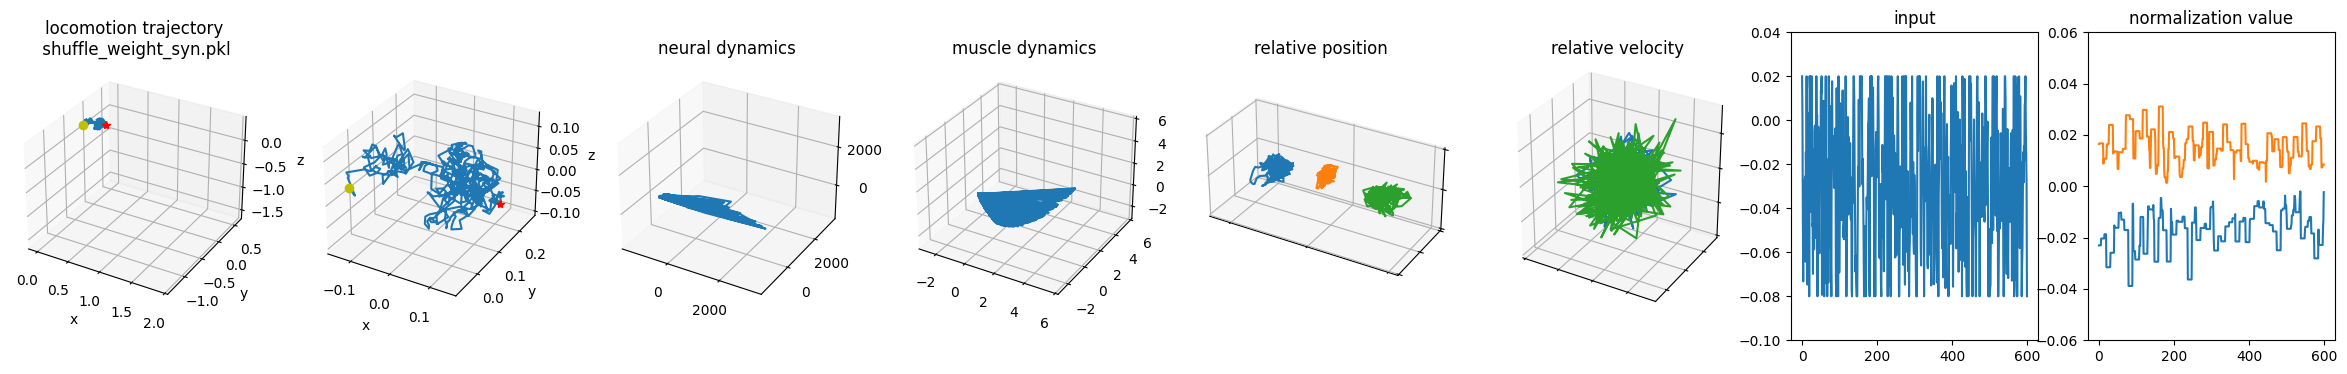

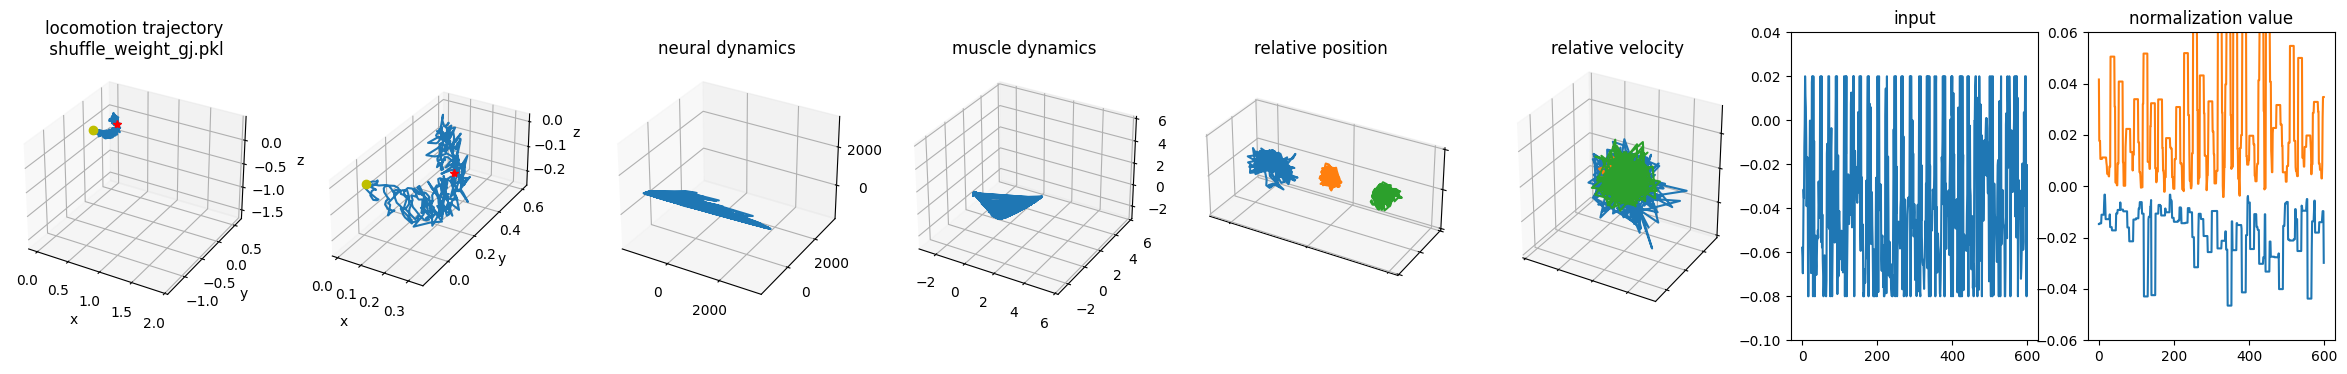

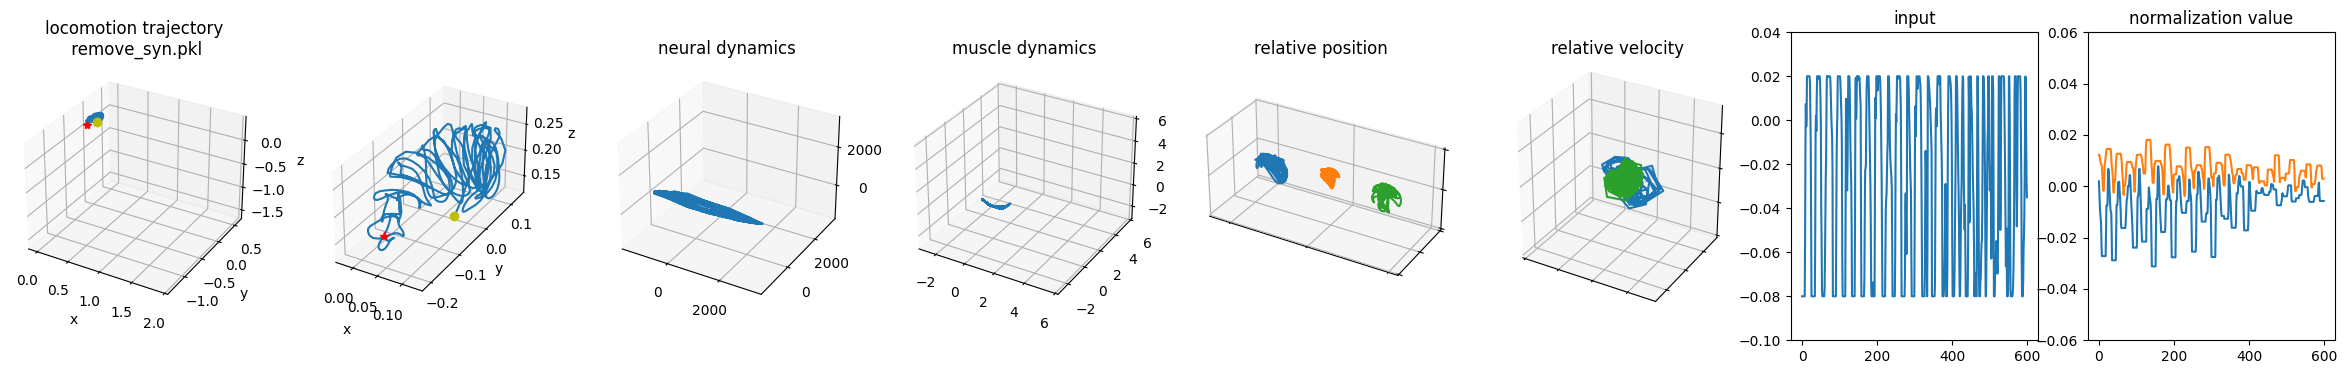

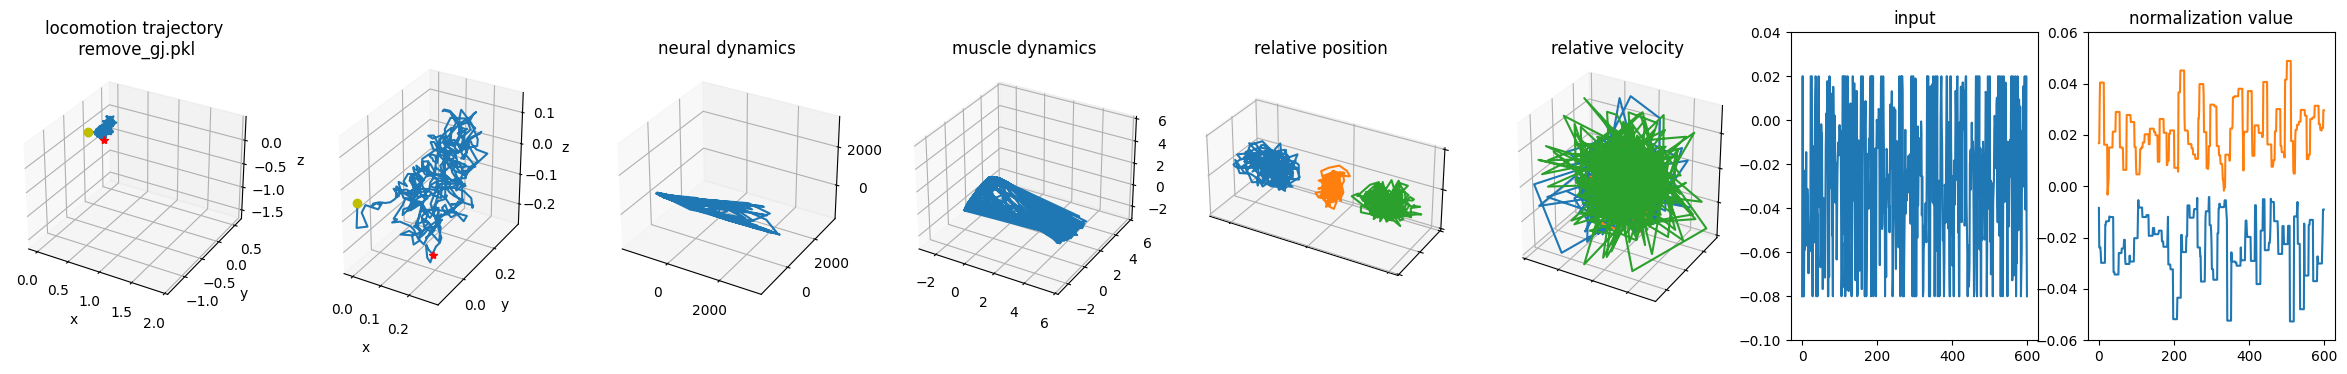

In [27]:
file_names = ["online_control.pkl", "remove_neurite.pkl", "shuffle_location.pkl", "shuffle_weight_syn.pkl", "shuffle_weight_gj.pkl", "remove_syn.pkl", "remove_gj.pkl"]
initial_time = 200
end_time =8000
smin, smax = np.zeros((len(file_names),), np.float64), np.zeros((len(file_names),), np.float64)
for i in range(len(file_names)):
    behavior_data = pickle.load(open(path.join("behavior", "pkl2", file_names[i]), 'rb'))
    # print(behavior_data.keys())
    sensory_input = np.array(behavior_data["sensory_input"])[initial_time:end_time]
    normalization_value = np.array(behavior_data["normalization_value"])[initial_time:end_time, :]
    neural_voltage = np.array(behavior_data["neural_voltage"])[initial_time:end_time, :]
    muscle_activation = np.array(behavior_data["muscle_activation"])[initial_time:end_time, :]
    behavior_value = np.array(behavior_data["behavior_value"])[:, initial_time:end_time, :]
    local_head_location = np.array(behavior_data["local_head_location"])[initial_time:end_time, :]
    world_head_location = np.array(behavior_data["world_head_location"])[initial_time:end_time, :]

    smin[i], smax[i] = np.min(local_head_location), np.max(local_head_location)

    # print("sensory_input.shape", sensory_input.shape)
    # print("normalization_value.shape", normalization_value.shape)
    # print("neural_voltage.shape", neural_voltage.shape)
    # print("muscle_activation.shape", muscle_activation.shape)
    # print("behavior_value.shape", behavior_value.shape)
    # print("local_head_location.shape", local_head_location.shape)
    # print("world_head_location.shape", world_head_location.shape)
    # print(np.min(smin), np.max(smax))

    fig = plt.figure(figsize=(30,4))
    locomotion_trajectory(fig.add_subplot(1,8,1, projection='3d'), fig.add_subplot(1,8,2, projection='3d'), local_head_location, file_names[i])
    if i == 1:
        neural_dynamics(fig.add_subplot(1,8,3, projection='3d'), neural_voltage, 1)
    else:
        neural_dynamics(fig.add_subplot(1,8,3, projection='3d'), neural_voltage)
    muscle_dynamics(fig.add_subplot(1,8,4, projection='3d'), muscle_activation)
    body_state1(fig.add_subplot(1,8,5, projection='3d'), fig.add_subplot(1,8,6, projection='3d'), behavior_value)
    neural_input(fig.add_subplot(1,8,7), fig.add_subplot(1,8,8), sensory_input, normalization_value)

online_control.pkl


/home/zhaomengdi/anaconda3/envs/eworm/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


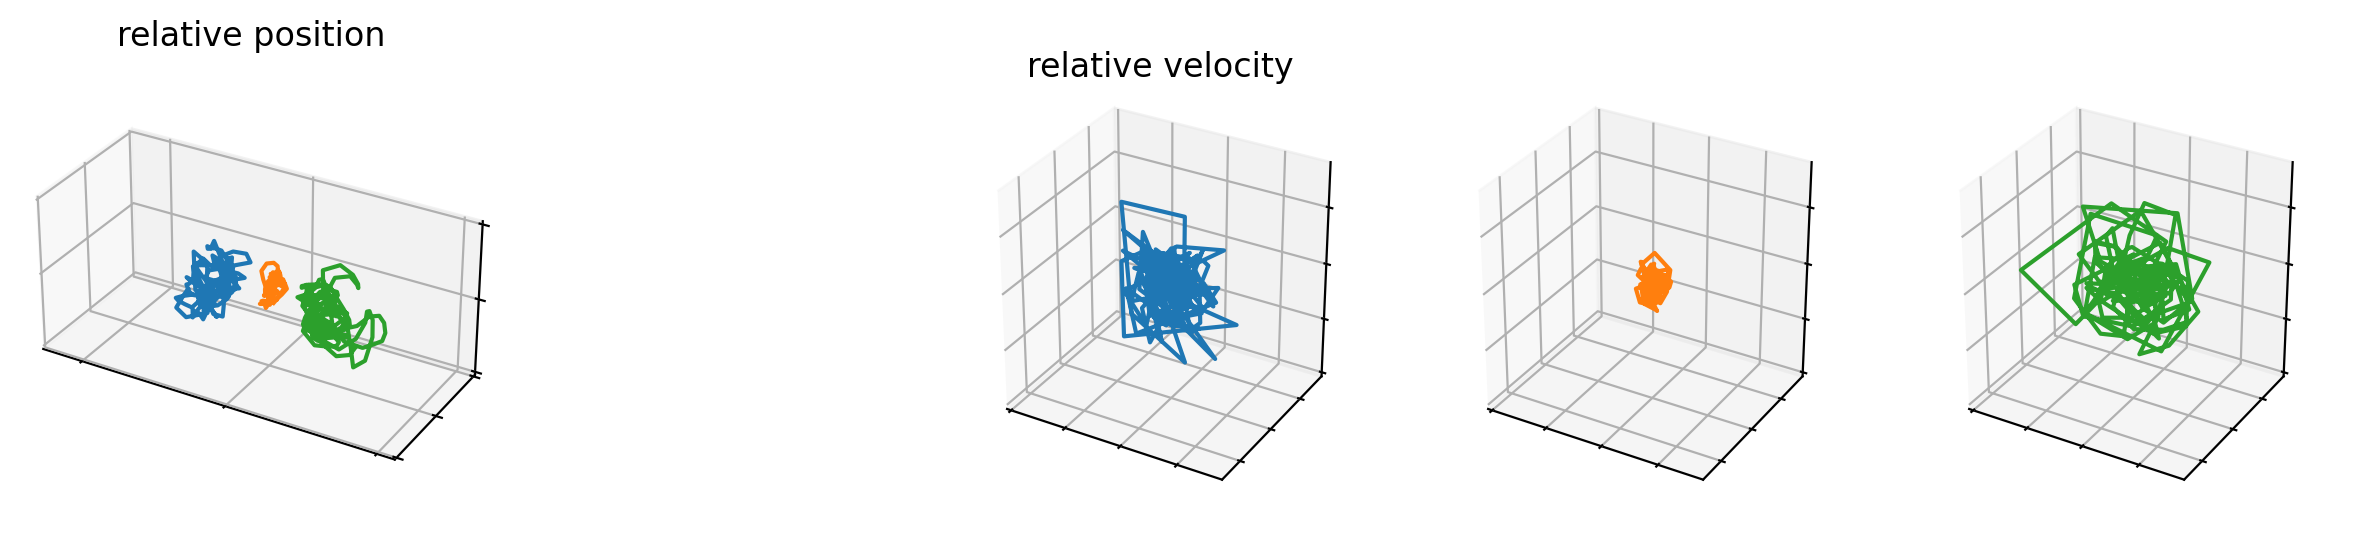

remove_neurite.pkl


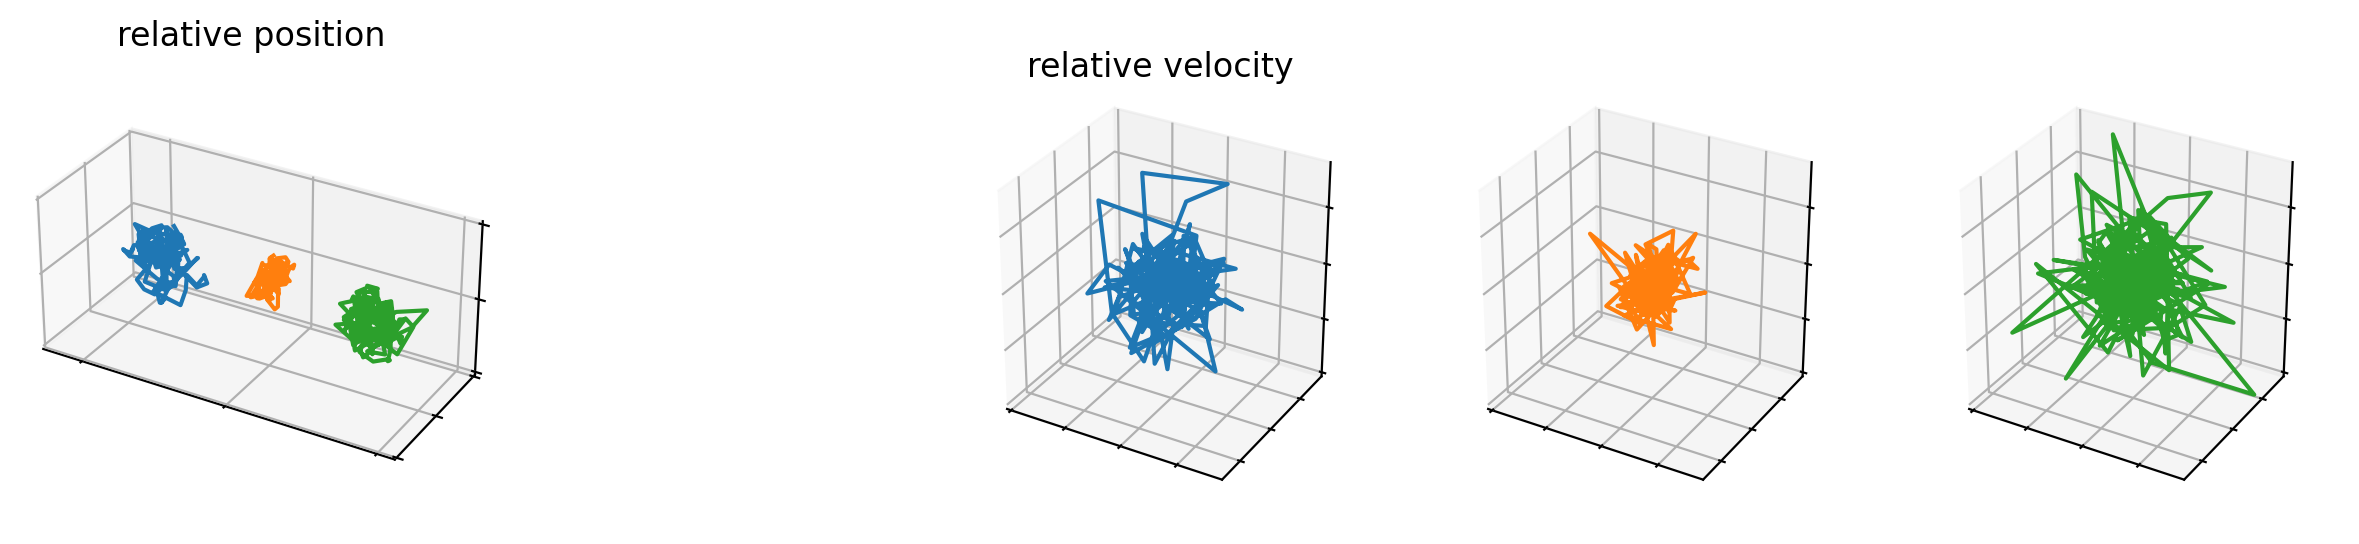

shuffle_location.pkl


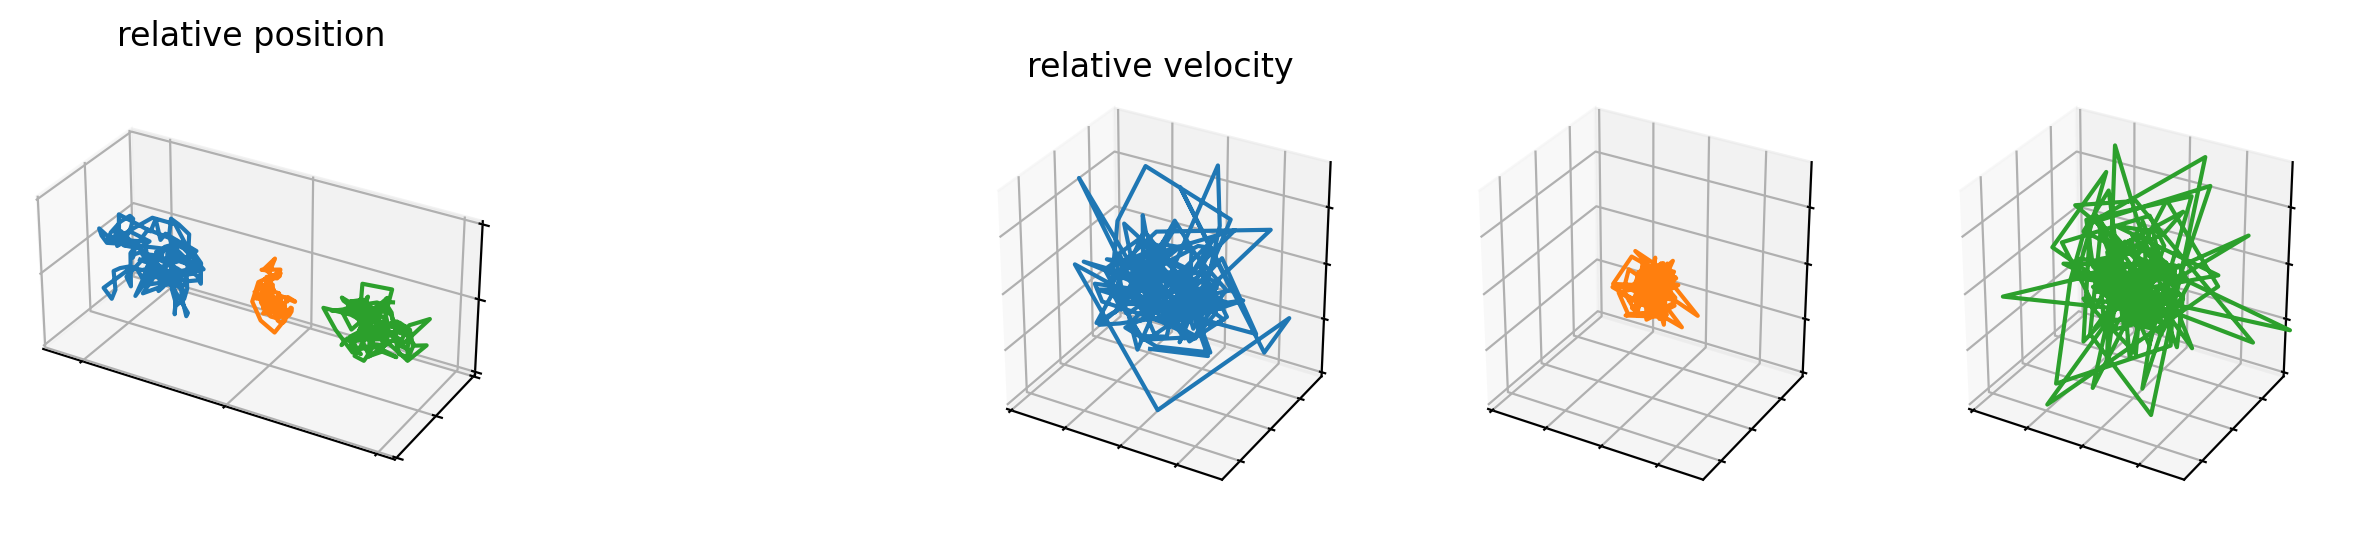

shuffle_weight_syn.pkl


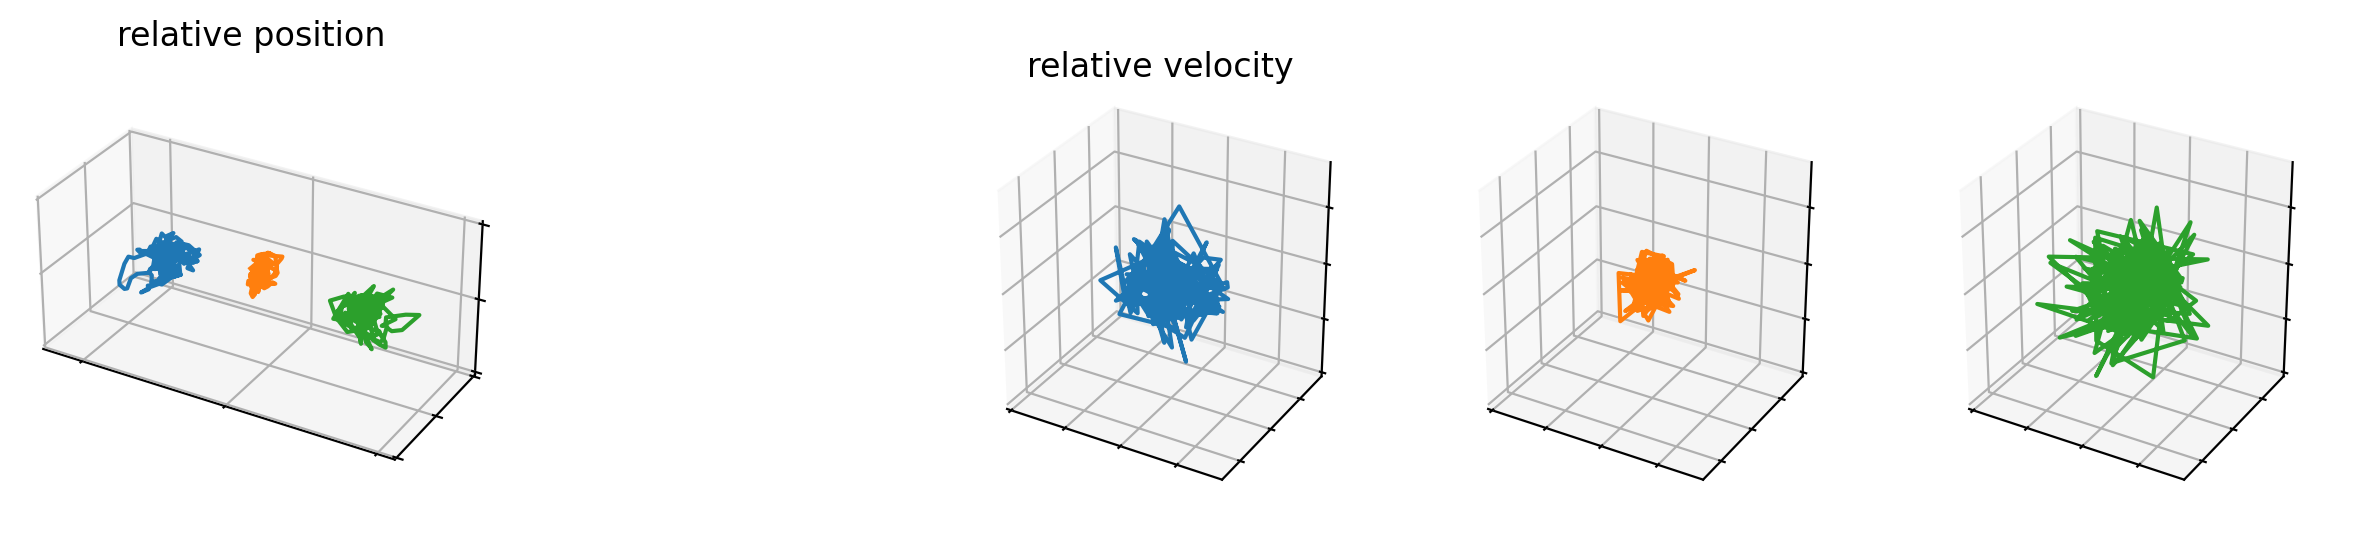

shuffle_weight_gj.pkl


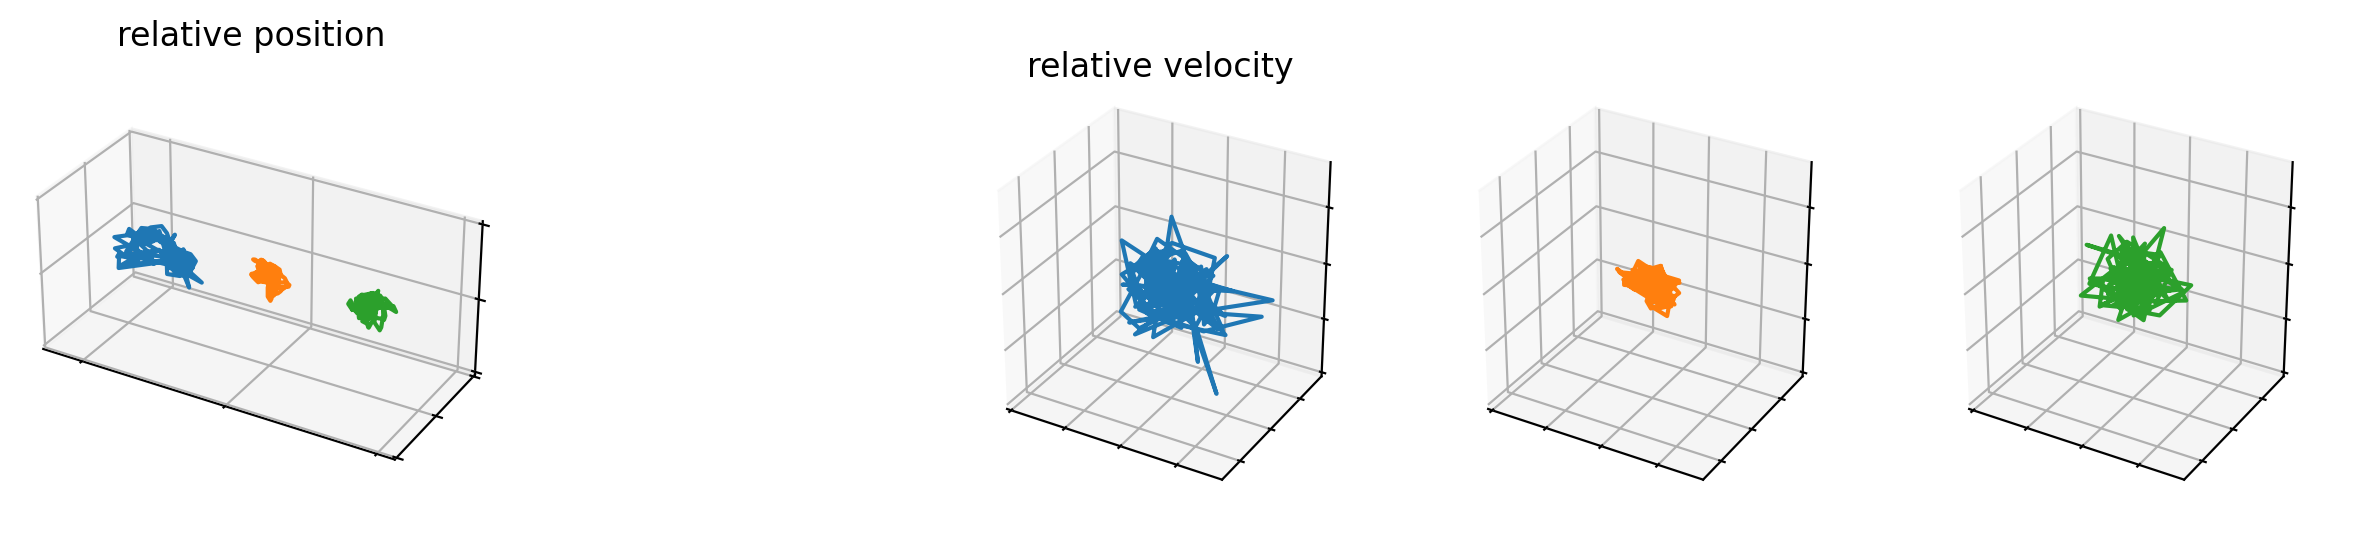

remove_syn.pkl


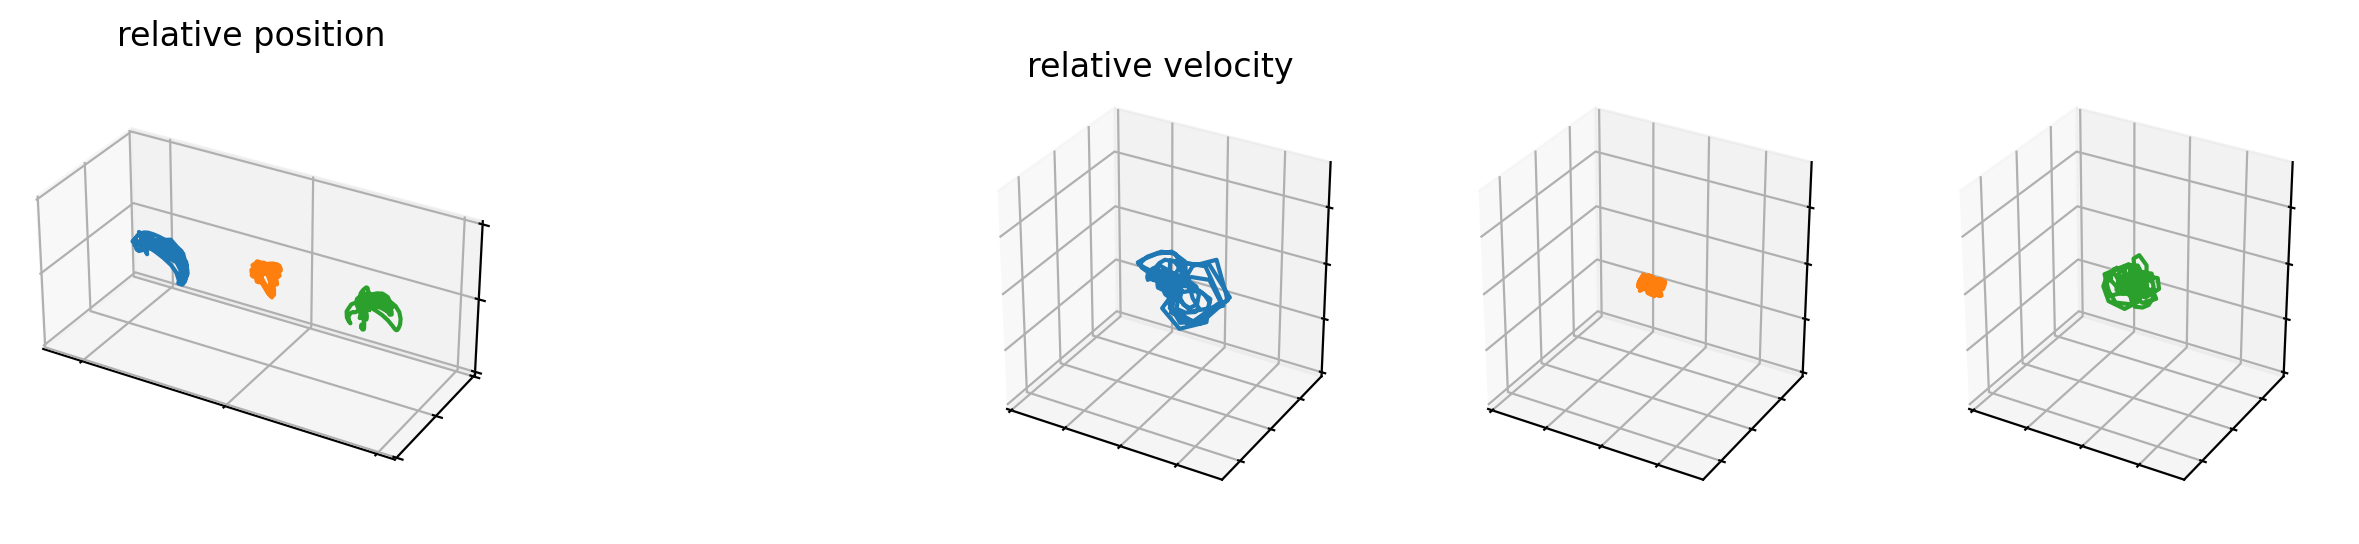

remove_gj.pkl


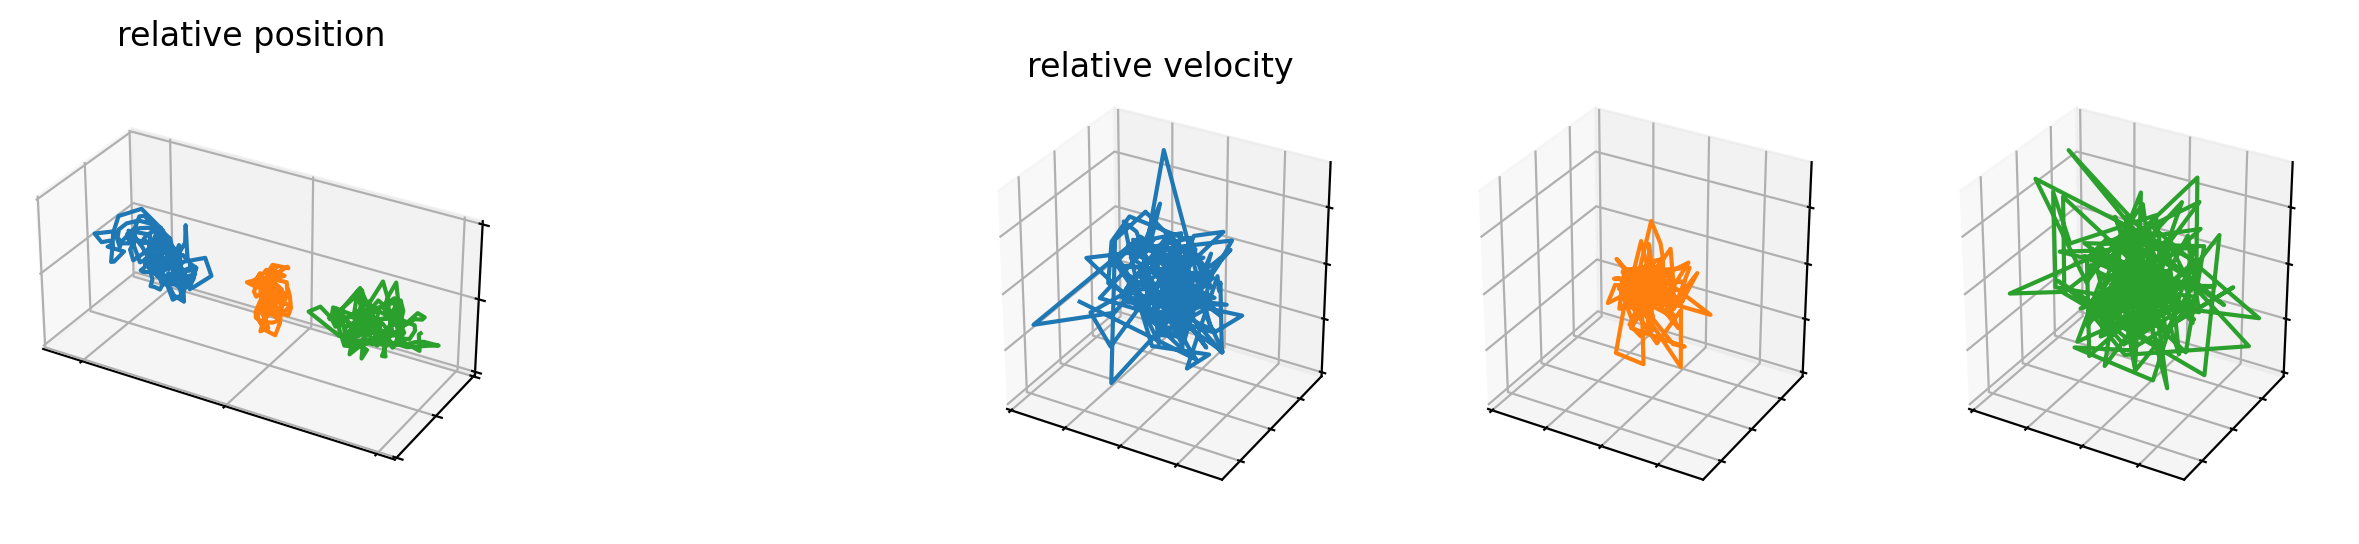

In [14]:
file_names = ["online_control.pkl", "remove_neurite.pkl", "shuffle_location.pkl", "shuffle_weight_syn.pkl", "shuffle_weight_gj.pkl", "remove_syn.pkl", "remove_gj.pkl"]
initial_time = 200
end_time = 400
for i in range(len(file_names)):
    behavior_data = pickle.load(open(path.join("behavior", "pkl2", file_names[i]), 'rb'))
    # print(behavior_data.keys())
    sensory_input = np.array(behavior_data["sensory_input"])[initial_time:end_time]
    normalization_value = np.array(behavior_data["normalization_value"])[initial_time:end_time, :]
    neural_voltage = np.array(behavior_data["neural_voltage"])[initial_time:end_time, :]
    muscle_activation = np.array(behavior_data["muscle_activation"])[initial_time:end_time, :]
    behavior_value = np.array(behavior_data["behavior_value"])[:, initial_time:end_time, :]
    local_head_location = np.array(behavior_data["local_head_location"])[initial_time:end_time, :]
    world_head_location = np.array(behavior_data["world_head_location"])[initial_time:end_time, :]

    print(file_names[i])
    fig = plt.figure(figsize=(15,3), dpi=200)
    body_state2(fig.add_subplot(1,4,1, projection='3d'), 
               fig.add_subplot(1,5,3, projection='3d'), 
               fig.add_subplot(1,5,4, projection='3d'), 
               fig.add_subplot(1,5,5, projection='3d'), behavior_value)
    plt.tight_layout()
    fig.savefig(path.join("behavior", "fig_"+file_names[i].replace(".pkl", ".png")))
    plt.show()
    